### Parkinson's Disease Recognition

#### The given data exists at https://www.kaggle.com/vikasukani/parkinsons-disease-data-set?select=parkinsons.data. This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds to one of 195 voice recordings from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to the "status" column which is set to 0 for healthy and 1 for PD. Let us start with the ML task below. 

In [1]:
#making necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
#importing the data

data = pd.read_csv('Parkinsons Disease Dataset/parkinsons.data')

In [3]:
#visualizing the data

data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
#Extracting the label values from the dataset.

labels = data.loc[:,'status'].values

In [5]:
#Extracting the required voice measurements from the dataset

values = data.loc[:, data.columns != 'status'].values[:,1:]

In [6]:
#making the train test split data on the voice measurements from the dataset with training size = 0.6 and testing size = 0.4

X_train, X_test, y_train, y_test = train_test_split(values, labels, random_state = 0, train_size = 0.6)

In [7]:
#Creating a Logistic Regression Classifier using the lbfgs solver and a maximum iterations of 8000 and fitting the training data

lrc = LogisticRegression(solver="lbfgs", max_iter = 8000).fit(X_train, y_train)

In [8]:
#Creating a K-Nearest Neighbors Classifier with number of neighbors as 10 and fitting the training data

knn = KNeighborsClassifier(n_neighbors = 10).fit(X_train, y_train)

In [9]:
#Creating a Support Vector Machine classifier with a linear kernel and fitting the training data

svm = SVC(C = 2, kernel='linear', probability=True).fit(X_train, y_train)

In [10]:
#Output of prediction on the test data using the Logistic Regression Classifier

output = lrc.predict(X_test)

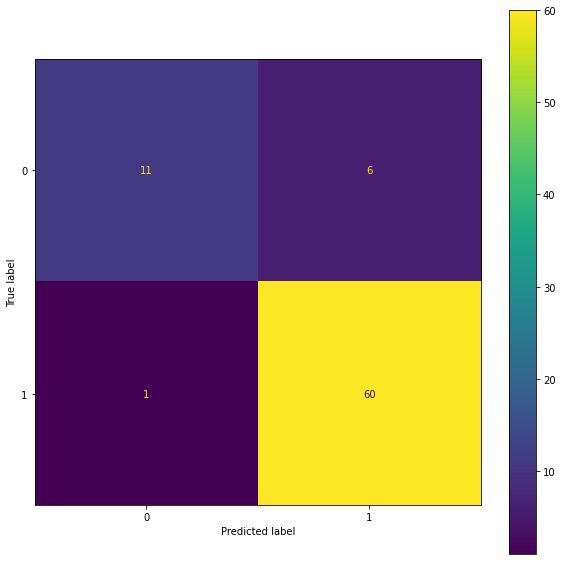

In [11]:
#Plotting the confusion matrix on the Logistic Regression Classifier using the test data

fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(lrc, X_test, y_test, ax = ax)  

In [12]:
#Output of prediction on the test data using the K-Nearest Neighbors Classifier

output2 = knn.predict(X_test)

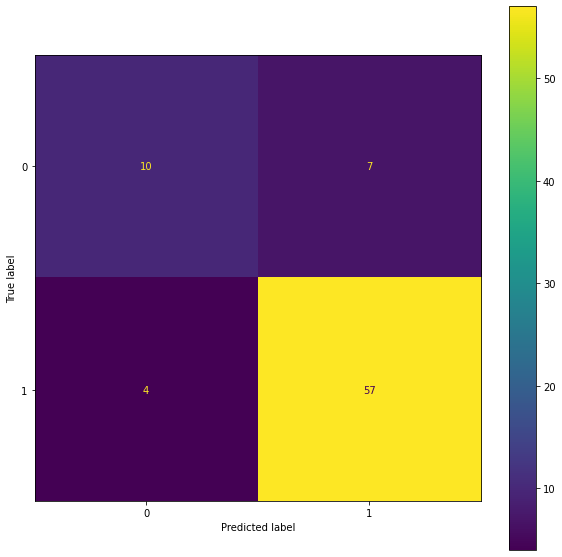

In [13]:
#Plotting the confusion matrix on the K-Nearest Neighbors Classifier using the test data

fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(knn, X_test, y_test, ax = ax) 

In [14]:
#Output of prediction on the test data using the Support Vector Machine Classifier

output3 = svm.predict(X_test)

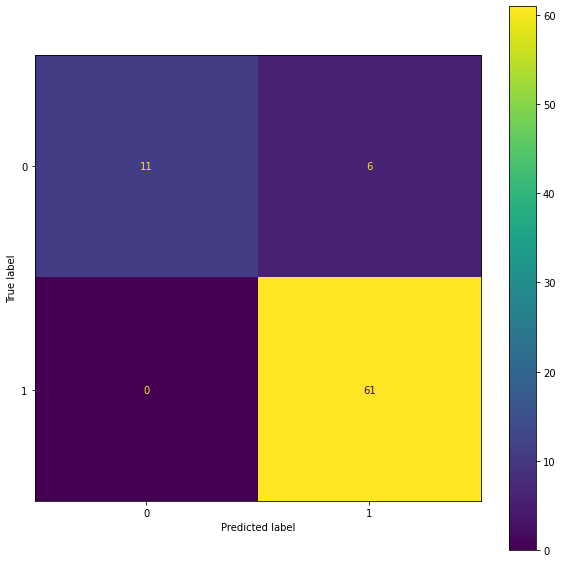

In [15]:
#Plotting the confusion matrix on the Support Vector Machine Classifier using the test data

fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(svm, X_test, y_test, ax = ax) 

In [16]:
#Calculating the accuracy score for the Logistic Regression Classifier on test data
 
accuracy = accuracy_score(y_test, output)

In [17]:
accuracy

0.9102564102564102

In [18]:
#Calculating the accuracy score for the K-Nearest Neighbours Classifier on test data

accuracy2 = accuracy_score(y_test, output2)

In [19]:
accuracy2

0.8589743589743589

In [20]:
#Calculating the accuracy score for the Support Vector Machine Classifier on test data

accuracy3 = accuracy_score(y_test, output3)

In [21]:
accuracy3

0.9230769230769231

In [22]:
#We use the model to predict the target values for test dataset.

y_score1 = lrc.predict_proba(X_test)[:,1]
y_score2 = knn.predict_proba(X_test)[:,1]
y_score3 = svm.predict_proba(X_test)[:,1]

In [23]:
#We have to get False Positive Rates and True Postive rates for the Classifiers because these will be used to plot the ROC Curve.

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, y_score3)

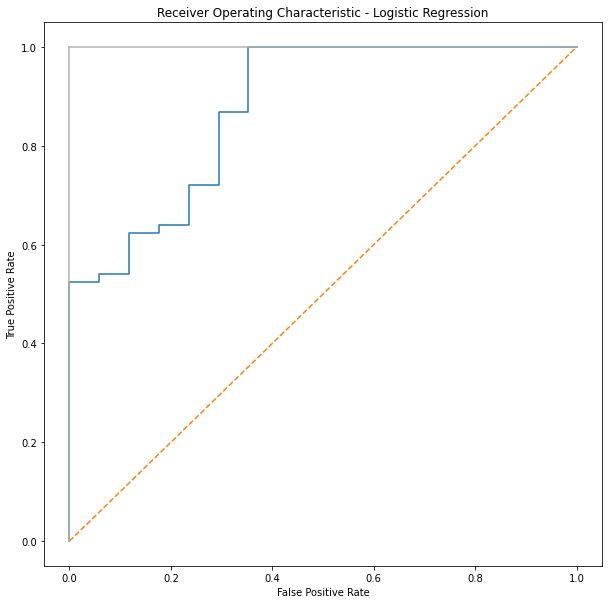

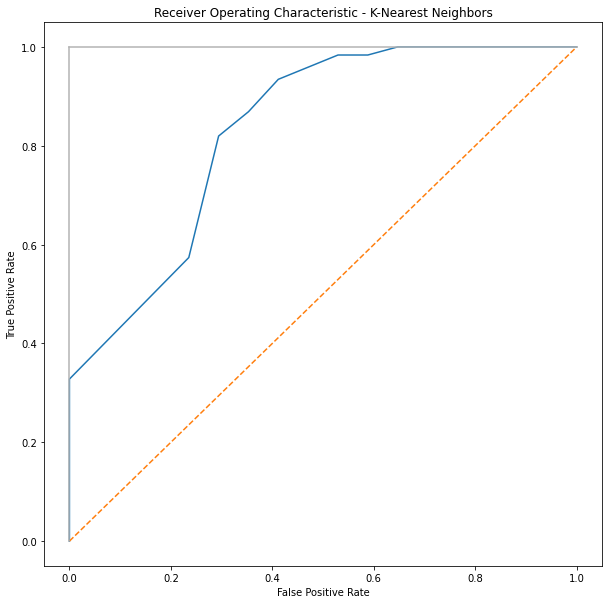

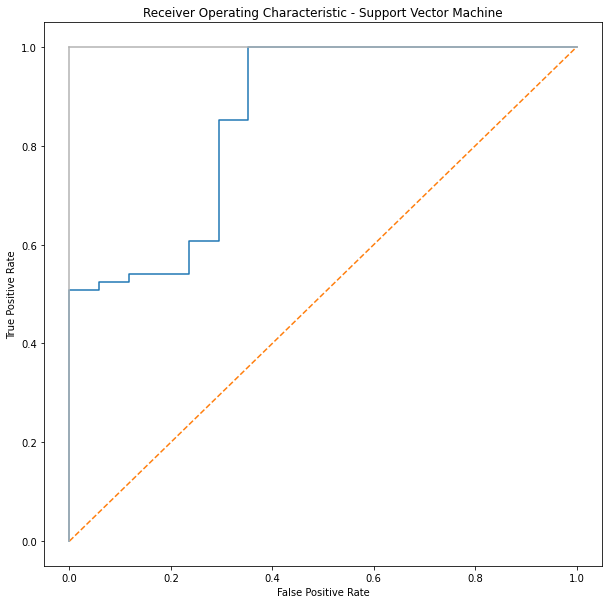

In [24]:
#Plotting the ROC curves and calculating the ROC - AUC scores, 

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - K-Nearest Neighbors')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Support Vector Machine')
plt.plot(false_positive_rate3, true_positive_rate3)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [25]:
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score1))
print('roc_auc_score for K-Nearest Neighbors: ', roc_auc_score(y_test, y_score2))
print('roc_auc_score for Support Vector Machine: ', roc_auc_score(y_test, y_score3))

roc_auc_score for Logistic Regression:  0.8775313404050145
roc_auc_score for K-Nearest Neighbors:  0.8317261330761813
roc_auc_score for Support Vector Machine:  0.8572806171648987
